# Clustering single-cell expression data 

In this lab you will use k-means and hierarchical clustering on some single-cell gene expression data from Guo et al. "Resolution of Cell Fate Decisions Revealed by Single-Cell Gene Expression Analysis from Zygote to Blastocyst" Developmental Cell, Volume 18, Issue 4, 20 April 2010, Pages 675-685, available from http://dx.doi.org/10.1016/j.devcel.2010.02.012. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import visualisation # Python functions from the PCA lab
import clustering # Python functions for this lab
import plotly
import plotly.express as px
import plotly.graph_objs as go
from sklearn.metrics import adjusted_rand_score

## The complete data

In [2]:
GuoDataAll = pd.read_csv('GuoData.csv', index_col=[0])
labelsAll = GuoDataAll.index 

## For this exercise you only need a subset of the data

In [3]:
frames = [GuoDataAll.iloc[labelsAll=='32 TE',:],GuoDataAll.iloc[labelsAll=='32 ICM',:],
          GuoDataAll.iloc[labelsAll=='64 TE',:],GuoDataAll.iloc[labelsAll=='64 EPI',:],
          GuoDataAll.iloc[labelsAll=='64 PE',:]]
data = pd.concat(frames)
labels = data.index
N, D = data.shape
print('Cells: %s, Genes: %s'%(N, D))
data.head()

Cells: 268, Genes: 48


,Actb,Ahcy,Aqp3,Atp12a,Bmp4,Cdx2,Creb312,Cebpa,Dab2,DppaI,...,Sox2,Sall4,Sox17,Snail,Sox13,Tcfap2a,Tcfap2c,Tcf23,Utf1,Tspan8
32 TE,0.319717,-0.255446,0.089953,0.241663,-0.741240,0.815178,-1.094123,0.232716,0.626778,1.323362,...,-1.384186,-0.338402,-0.951007,0.002382,0.314471,1.886886,-0.475611,-1.141535,-0.533710,0.469163
32 TE,0.584569,-0.172843,0.077378,1.446409,-0.638402,0.533226,-1.003183,0.400313,0.760784,1.237451,...,-1.308297,-0.650384,-0.397902,-1.108408,0.382266,1.282107,-0.216919,-1.058685,-1.463726,0.673984
32 TE,0.260861,-0.085078,0.237703,1.996922,-0.666771,0.733321,-1.028270,0.820773,0.861289,1.435306,...,-0.007710,-0.460482,-0.577543,-1.125080,0.123999,1.497058,-0.192514,-1.081540,-1.486409,0.987239
32 TE,0.834706,-0.002475,0.209410,1.107325,-0.468186,0.605988,0.357778,0.394432,0.730633,1.216624,...,-1.182687,-0.424310,0.334845,-1.008374,0.408093,1.078085,-0.236443,0.049790,-0.326725,0.833624
32 TE,0.305003,0.167893,0.360303,1.414495,-0.496555,0.546869,-0.877749,0.135687,0.516223,1.284312,...,-0.062664,-0.609691,-0.043347,-1.025047,0.043291,0.593533,-0.504897,-0.944409,-1.350309,0.710128


In [4]:
W,scores,fracs = visualisation.do_pca(data)
scores = scores/abs(scores).max().max()

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10).fit(data.values)

In [6]:
kmeanslabels = kmeans.labels_

print(kmeanslabels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 2 2 1 1 2 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 4 0 0 0 4 4
 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4
 4 4 0 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3
 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


In [7]:
fig = px.scatter(scores, x='PC1', y='PC2', color=labels, symbol=kmeanslabels)
fig.update_traces(mode='markers', marker_line_width =1, marker_size=8)
fig.show()

In [8]:
df = pd.DataFrame({'Labels':labels,'Clusters':kmeanslabels})
ct = pd.crosstab(df['Clusters'],df['Labels'])
print(ct)

Labels    32 ICM  32 TE  64 EPI  64 PE  64 TE
Clusters                                     
0              3     56       0      0      5
1             38      4       1      0      0
2              7      0       0     44      0
3              0      0      18      0      0
4              1      0       0      0     91


In [9]:
kmeansARI = adjusted_rand_score(kmeanslabels, labels)
print(kmeansARI)

0.8311719269748188


In [10]:
from scipy.cluster.hierarchy import linkage
np.set_printoptions(precision=5, suppress=True)
%matplotlib inline

In [11]:
X = data.values
print('Shape', X.shape)
z = linkage(X,method='ward',metric='euclidean')
print(z)

Shape (268, 48)
[[178.      179.        2.24205   2.     ]
 [130.      140.        2.4239    2.     ]
 [148.      157.        2.54753   2.     ]
 ...
 [528.      530.       28.0905  156.     ]
 [529.      531.       43.58488 112.     ]
 [532.      533.      102.11177 268.     ]]


In [12]:
z[0:5,:]

array([[178.     , 179.     ,   2.24205,   2.     ],
       [130.     , 140.     ,   2.4239 ,   2.     ],
       [148.     , 157.     ,   2.54753,   2.     ],
       [177.     , 180.     ,   2.69111,   2.     ],
       [147.     , 149.     ,   2.75095,   2.     ]])

In [13]:
z[266,:]

array([532.     , 533.     , 102.11177, 268.     ])

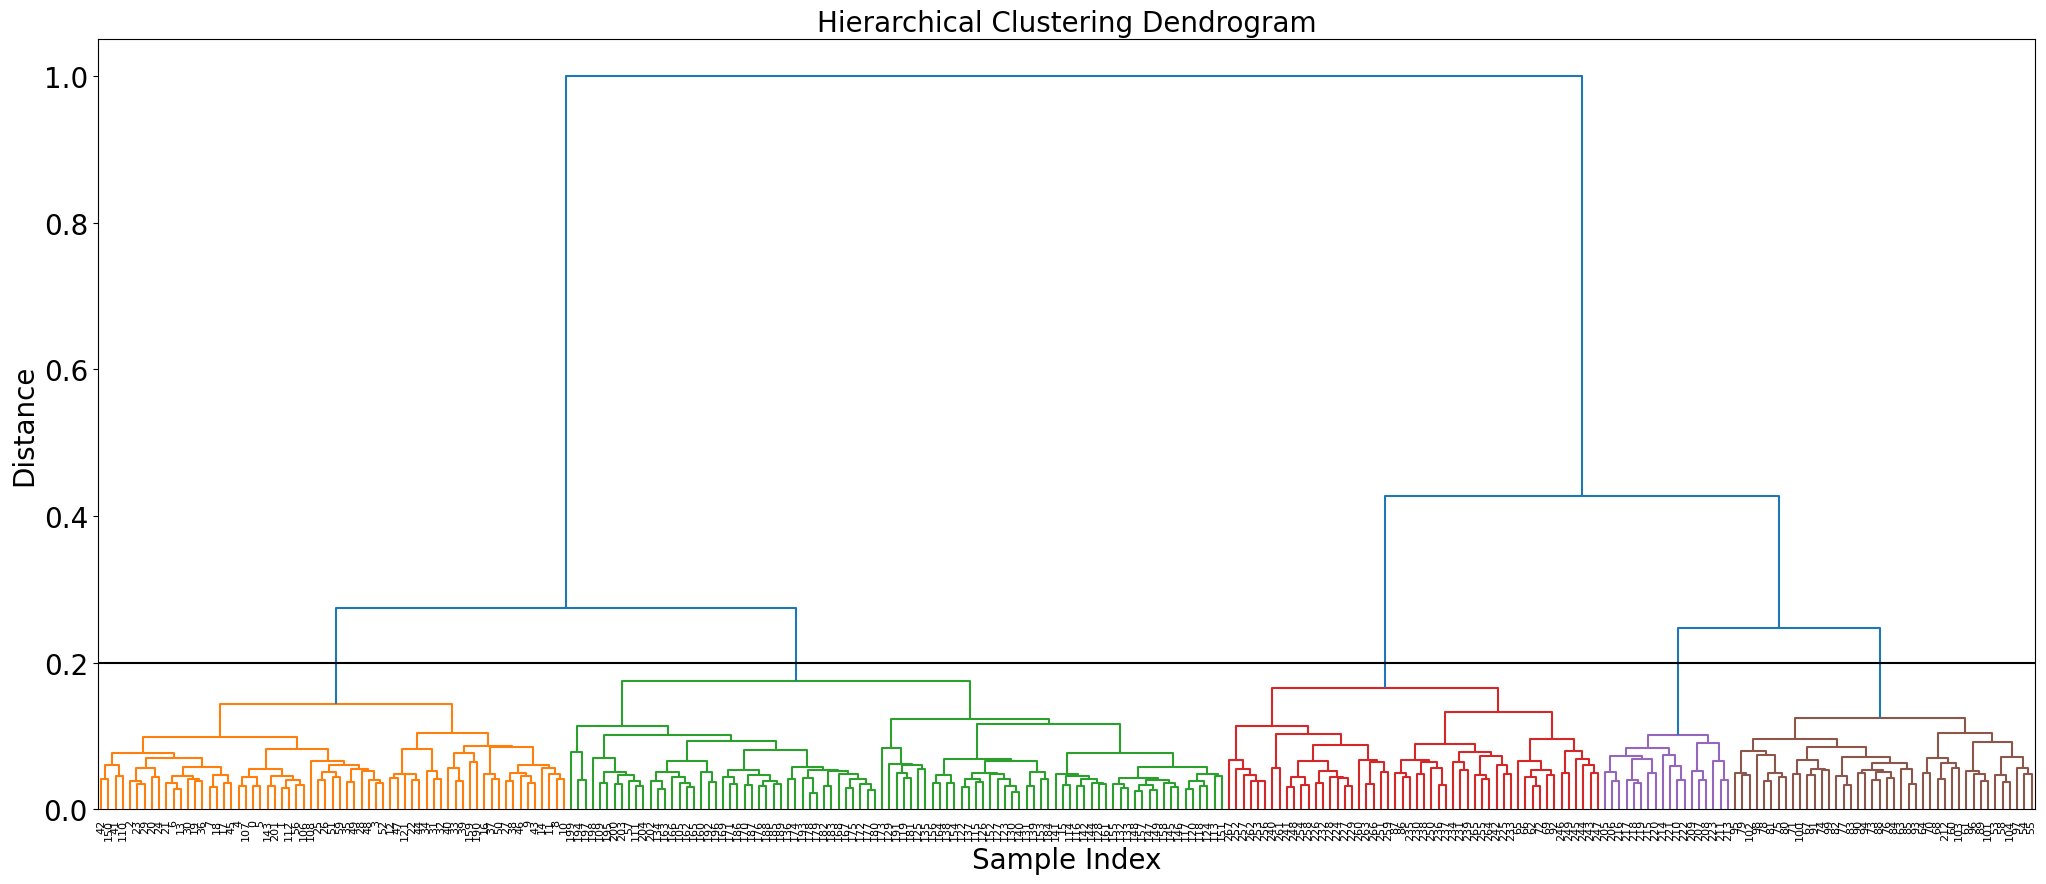

In [14]:
clusterlabels = clustering.Dendogram(data, method='ward', metric='euclidean', distanceThreshold=0.2)

In [15]:
fig = px.scatter(scores, x='PC1',y='PC2',color=labels,symbol=clusterlabels)
fig.update_traces(mode='markers',marker_line_width=1, marker_size=8)
fig.show()

In [16]:
df = pd.DataFrame({'Labels':labels,'Clusters':clusterlabels})
ct = pd.crosstab(df['Clusters'],df['Labels'])
print(ct)

Labels    32 ICM  32 TE  64 EPI  64 PE  64 TE
Clusters                                     
0              3     54       0      0      8
1              1      2       0      0     88
2             37      4       1      0      0
3              8      0       0     44      0
4              0      0      18      0      0


In [17]:
HierarchicalARI = adjusted_rand_score(clusterlabels,labels)
print(HierarchicalARI)

0.7730469212018003


Questions answers:

How well do the different algorithms cluster cells into these five cell\-types?

Both algorithms do not cluster the data perfectly but they both are pretty good. Based on the adjusted ARI score Kmeans clustering was better as it got a score of 0.83 whereas hierarchical clustering got a score of 0.77 

What happens when you change the linkage method from "ward" to "average" in the hierarchical clustering algorithm?

If you switch to average the hierarchical clustering algorithm becomes a lot worse. It achieves an adjusted rand score of 0.00070 which is bad.

How would you assess the performance of these different clustering approaches if you didn't have ground truth labels?

We would need to carry out internal validation methods to asses the performance of the clustering. One example of this is a silhouette analysis in which there is a threshold that defines a good cluster and if all clusters score above this threshold then it is successful clustering
